# A GRAVITATIONAL-WAVE STANDARD SIREN MEASUREMENT OF THE HUBBLE CONSTANT 

In this notebook I will follow all the steps to derive the H0 value using the GW event GW170817 and it's optical counterpart. Less than two seconds after the merger of the binary neutron star a gamma ray burst was detected in the region of the sky consist of the LIGO-Virgo derived location for the source of the gravitational wave. GRB170817A
\
In this notebook I will apply a PE to derive the luminosity distance from the source and knowing it's optical counterpart provides the redshift of the source whih I can use to measure the H0 value from this observation.

## 1- Probability of optical counterpart association with NGC4993

This probability is actually the quantification of miss-identifying the galaxy host of the GRB event. This means that a fainter galaxy can be the host and we're miss-identifying the NGC4993 or a brighter galaxy as the host. So now we should find the probability of miss-identification, namely the probabilty of existance of a brighter galaxy that can be mis-recognized as the host.


We measure how often the center of one or more such galaxies falls in the twice of the half light radius of the NGC4993 and is brighter than K=9.2 mag which is the magnitude of NGC4993 in the K-band.
\
\
We assume a poisoonian distribution:

$S(<m)$ = Surface density of galaxies brighter than m 

$ P = 1- exp[ - \pi \theta^2 S(<K)]$

NGC4993's diameter ~ 1.1'

$ S(<K) = 0.68 \times 10^{(0.64(K-10) -0.7)} deg^{-2} = 0.06 deg^{-2}$ 
$\rightarrow$

$P = :$ 

In [1]:
import numpy as np
P = 1 - np.e**(-0.68 * (10**(0.64*(9.2-10)-0.7)) * np.pi * (1.1/60)**2)
P = P *100
print("Probability: ", P, "%")

Probability:  0.004406888732388925 %


Now we have the probability of miss-identification.

for the measurement of Hubble constant we will use the nave approximation of:
$v_H = H_0 d$

   Considering that the difference in different distance measuresis __of order of $v_H /c$__, at these distances this difference is as small as __1 percent__ so we can safely put __Luminosity distance = Comoving distance__ and use the $D_L$ comes from the GW PE as the comoving distance in the Hubble relation. This method is also insesitive to every other cosmological parameters. 
   
Now we should find the Hubble velocity of the galaxy.

## 2- Hubble velocity of NGC4993

The whole point of this work is its independancy from calibrations used in the distance ladders. So previously the Hubble velocity been measured using secondary relations like Tully-Fisher relation or typeIa supernovas.

Here we estimate the Hubble flow velocity at the position of NGC4993 using the recessional velocity and correcting it for local pevuliar motions.

### Sources of local peculiar motions:

1- Recession velocity of the galaxy group relative to the CMB: $3327\pm 72\ km\ s^{-1}$

We assume that all the galaxies are in the same distance and thus has the same Hubble flow velicty, radius of group is 0.4 Mpc. Thus this assumption is accurate to within $\Delta v_H / v_H = H_0 \Delta d / ( H_0 d) = 0.4/40 = 1\%$
in the ~40Mpc distance.

2- Peculiar velocity caused by the local field, weighted radial component of the peculiar velocity and associated uncertainity using 6dF galaxy redshift survey peculiar velocity map: $ <v_p> = 310 \pm 69 \ km\ s^{-1}$

$\rightarrow$ therefore:

###            Estimated Hubble velocity = $v_H$ = $3017 \pm 166\ km\ s^{-1}$

## 3- Bayesian estimation to find the Hubble constant

First we marginalize the probability over all parameters except inclination angle and distance:


$p(x_{GW}| d, cos \tau) = \int p(x_{GW} |d,cos \tau, \lambda ) p(\lambda)d\lambda $

Now we consider that there is a perfect knowledge of Hubble flow velicty $v_H$ then we will have: $d = v_H/H_0$

__Using the Bayes theorem:__

$p(d, cos \tau| x_{GW}) \ = \ p( x_{GW} | d, cos \tau) \ p(d,cos \tau) \ = \ p(x_{GW}|d=v_H/H_0, cos \tau) \ p_d(d=v_H/H_0)\ p_{\tau}(cos\tau)$

On the other hand :<font color='blue'>$p(d, cos \tau | x_{GW}) \ d \ = \ p(H_0, cos \tau | x_{GW} ) \ \ H_0$ </font> <font color='red'> ? </font>

$ \lambda = $ all the other variables but d and $H_0$

$\int p(d, \lambda) dd = \int p(H_0, \lambda) dH_0 $

$\frac{d}{dH_0} \int p(d, \lambda) dd = \frac{d}{dH_0} \int p(H_0, \lambda) dH_0 $ = $ \int \frac{dp(d, \lambda)}{dH_0} dd \ = \  \int \frac{dp(d,\lambda)}{dd}dd\ \frac{dd}{dH_0} \ = \ p(H_0, \lambda)$ $\rightarrow$

$p(H_0, \lambda ) \propto \frac{v_H}{H_0^2} p(d, \lambda) $

Then we will have:

### $p(H_0, cos \tau | x_{GW}) \propto \frac{v_H}{H_0^2} \ p(x_{GW}\ | \ d = v_H/H_0\ ,\ cos \tau)\ p_d(d)\ p_{\tau}(cos \tau)$


__First we work with the case where $v_H = 3017 km s^{-1}$ fixed__



### First naive estimation of the Hubble constant:

In the naive case of hubble constant estimating we'll just read the maximum posterior for distance from GW PE and use the Hubble relation and the above measure Hubble flow velocity


In [2]:
#Loading the GW PE

from __future__ import print_function
import os
import matplotlib
%matplotlib inline
from matplotlib import pyplot

from IPython.display import Image
from pycbc.inference.io import loadfile
fp = loadfile('./d_L-posteriors/GW170817_124104-PYCBC-POSTERIOR-XPHM.hdf', 'r')

list(fp['samples'].keys())

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


['chi_eff',
 'delta_tc',
 'distance',
 'inclination',
 'lambda1',
 'lambda2',
 'loglikelihood',
 'logwt',
 'polarization',
 'q',
 'redshift',
 'spin1z',
 'spin2z',
 'srcmass1',
 'srcmass2',
 'srcmchirp']

__As we see in the posteriors of our desired GW event, there is no RA or DEC posterior, it's because they had been fixed in the parameter estimation to the GRB170817 coordinate values.__


H0 value estimated with the mean of the posterior distribution:  72.11412969313129
H0 value estimated with the maximum of the posterior distribution:  [67.12231787]


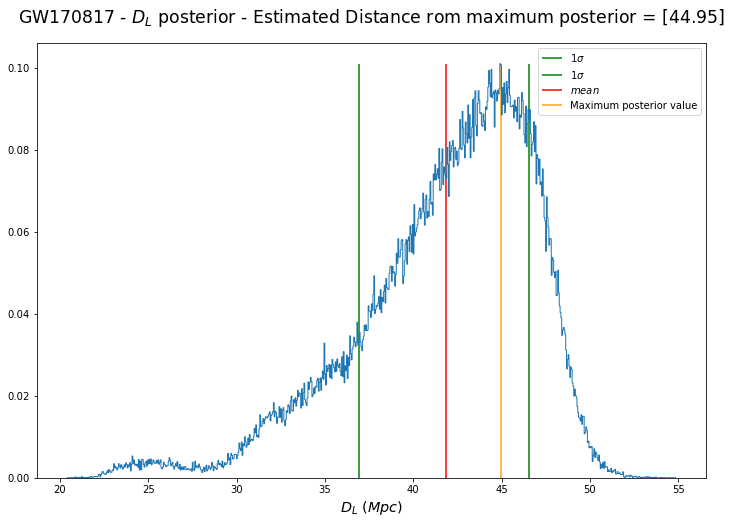

In [3]:
distance_posterior = np.array(fp["samples"]["distance"])

#Plotting the distance posterior:
import matplotlib.pyplot as plt
mean_dist = np.mean(distance_posterior)
median_dist = np.median(distance_posterior)
sigma_dist_down = np.quantile(distance_posterior, 15.7/100)
sigma_dist_up = np.quantile(distance_posterior, 1 - 15.7/100)
dist = np.histogram(distance_posterior, density= True, bins =int(np.sqrt(len(distance_posterior))))[0]
points =  np.histogram(distance_posterior, density= True, bins =int(np.sqrt(len(distance_posterior))))[1][1:] 

top = max(dist)
max_lik_dist = points[dist == top]
plt.subplots(figsize = (12,8))
plt.vlines(sigma_dist_up, 0, top, label = "$1 \sigma$" , color = "green")
plt.vlines(sigma_dist_down, 0 ,top, label = "$1 \sigma$", color = "green")
plt.vlines(mean_dist, 0, top , label = "$ mean$", color = "red")
plt.vlines(max_lik_dist, 0, top , label = "Maximum posterior value", color = "orange")

plt.hist(distance_posterior, histtype= "step", density=True, bins = int(np.sqrt(len(distance_posterior))) )
plt.title("GW170817 - $D_L$ posterior - Estimated Distance rom maximum posterior = "+ str(np.round(max_lik_dist, 2)) , pad = 20, fontsize = "xx-large")
plt.xlabel("$D_L$ $(Mpc)$", fontsize = "x-large")
plt.legend()



v_h = 3017
h0 = v_h / mean_dist

print("H0 value estimated with the mean of the posterior distribution: ", h0)

v_h = 3017
h0 = v_h / max_lik_dist

print("H0 value estimated with the maximum of the posterior distribution: ", h0)





We see a large difference estimationg the H0 value from mean or maximum posteriori distribution! It's worrying!!

### DOING THINGS THE RIGHT WAY!

I assume a flat prior on H0 value for every value also I marginalize the posterior relation on all the inclination angles and with this assumptions I'll go on to compute the posterior on the H0 from posterior on $D_L$ directly:

$p( H_0 \ |\ x_{GW}) \propto \ \frac{v_H}{H_0^2} \ p(d= v_H/H_0 \ | \ x_{GW})$

This kind of posterior just implies that the posterior on $H_0$ inherits a $1/H_0^2$ factor in it.

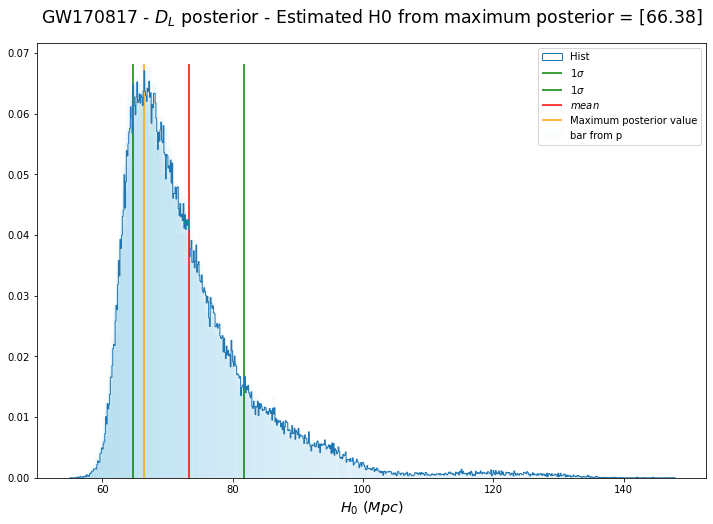

In [4]:
dist_distance = np.histogram(distance_posterior, density= True, bins =int(np.sqrt(len(distance_posterior))))[0]
points_distance =  np.histogram(distance_posterior, density= True, bins =int(np.sqrt(len(distance_posterior))))[1][1:] 
points_h0 = v_h / points_distance
h0_posterior = v_h / distance_posterior

alpha = v_h / (points_h0**2)
dist_h0 = alpha * dist_distance

#Plotting H0 posterior
#Plotting the distance posterior:
mean_h0 = np.mean(v_h/distance_posterior)
median_h0 = np.median(v_h/distance_posterior)
sigma_h0_down = np.quantile(v_h/distance_posterior, 15.7/100)
sigma_h0_up = np.quantile(v_h/distance_posterior, 1 - 15.7/100)
top = max(dist_h0)
max_lik_h0 = points_h0[dist_h0 == top]

plt.subplots(figsize = (12,8))
plt.vlines(sigma_h0_up, 0, top, label = "$1 \sigma$" , color = "green")
plt.vlines(sigma_h0_down, 0 ,top, label = "$1 \sigma$", color = "green")
plt.vlines(mean_h0, 0, top , label = "$ mean$", color = "red")
plt.vlines(max_lik_h0, 0, top , label = "Maximum posterior value", color = "orange")


plt.hist(v_h/distance_posterior, histtype= "step", density=True, bins = int(np.sqrt(len(h0_posterior))), label="Hist")

plt.bar(points_h0,dist_h0, alpha = 0.05, label="bar from p", color = "skyblue" )#, histtype= "step", density=True, bins = int(np.sqrt(len(h0_posterior))) )
plt.title("GW170817 - $D_L$ posterior - Estimated H0 from maximum posterior = "+ str(np.round(max_lik_h0, 2)) , pad = 20, fontsize = "xx-large")
plt.xlabel("$H_0$ $(Mpc)$", fontsize = "x-large")
plt.legend()


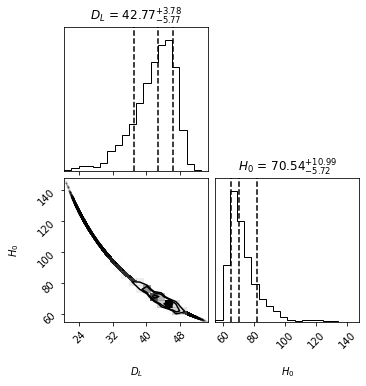

In [5]:
import corner
import numpy as np

samples = np.vstack([distance_posterior, h0_posterior]).T
figure = corner.corner(samples, labels=[r"$D_L$", r"$H_0$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

# General API

For further analysis I'll employ a more general API and try to do the analysis with this one

Consider a GW event generates the x_{GW} data in the detector with a recessional velocity for the Host equal to $v_r$ and peculiar velocity field of $<v_p>$ in the vicinity of the host.

__Summary of Our Three observation that all of them are independent:__

| Underlying values which we want to estimate | Observations |
| --- | --- |
| $H_0$ | $x_{GW}$ |
| $v_p$ | $<v_p>$ |
| $D_l$ |  $v_r$ |
| $cos \tau$ | |

then the general posterior for all these independent measurements will be:

<font color='darkblue'> $p(x_{GW}, v_r, <v_p> \ |\ d, cos\tau , v_p , H_0 ) \ = \ p(x_{GW}\ | \ d, cos\tau) \ p(v_r \ | \ d, v_p, H_0) \ p(<v_p> \ | \ v_p ) $  </font>
 
$\rightarrow$

Using Bayes theorem $\rightarrow$

$ p(\ d, cos\tau , v_p , H_0 \ | \ x_{GW}, v_r, <v_p> \ )$ = 
<font color='darkblue'> $ p(x_{GW}, v_r, <v_p> \ |\ d, cos\tau , v_p , H_0 )\ \times\ $ </font> 
<font color='darkgreen'> $p(d) \ p(cos\tau) \ p(v_p) \ p ( H_0) \ $ </font>
<font color='purple'>$/\  N_s(H_0)$ </font>

and with the previous relation that we had it will be:

$\rightarrow$

$ p(\ d, cos\tau , v_p , H_0 \ | \ x_{GW}, v_r, <v_p> \ )$ = 
<font color='darkblue'> $  \ p(x_{GW}\ | \ d, cos\tau) \ p(v_r \ | \ d, v_p, H_0) \ p(<v_p> \ | \ v_p )\  \times$ </font> 
<font color='darkgreen'> $p(d) \ p(cos\tau) \ p(v_p) \ p ( H_0) \ $ </font>
<font color='purple'>$/\  N_s(H_0)$ </font>


__Now we should only understand each of these parts separatly__

Posterior: $ p(\ d, cos\tau , v_p , H_0 \ | \ x_{GW}, v_r, <v_p> \ )$ = 
<font color='darkblue'> $  \ p(x_{GW}\ | \ d, cos\tau)\  \times$ </font>
<font color='orange'>$\ p(v_r \ | \ d, v_p, H_0) \ \times $</font>
<font color='grey'>$\ p(<v_p> \ | \ v_p )\ \times$</font>
<font color='darkgreen'> $p(d) \ p(cos\tau) \ p(v_p) \ p ( H_0) \ $ </font>
<font color='purple'>$/\  N_s(H_0)$ </font>



__1__
<font color='darkblue'> $  \ p(x_{GW}\ | \ d, cos\tau)\ $ </font> = Comes from the GW parameter estimation, posterior on inclination angle and distance

For the future uses I just use the marginalized likelihood over all the values of the inclination angle at the moment 

__2__
<font color='orange'>$\ p(v_r \ | \ d, v_p, H_0) \ $</font> = Likelihhod of the recessional measurement

We can model this likelihood as a Gaussian distributon around the estimated values for the NGC4993

<font color='orange'>$\ p(v_r \ | \ d, v_p, H_0) \ $</font> = $N[v_p+ H_0 d , \sigma_{v_r}^2]\ (v_r) $

with: $v_r = v_p + H_0 d = 3327 \ km \ s^{-1}$ and $\sigma_{v_r} = 72\  km\  s^{-1}$

__3__
<font color='grey'>$\ p(<v_p> \ | \ v_p )\ $</font> = Likelihood for the measured peculiar velocity

We again assume it as a Gaussian likelihood and then we will have:

<font color='grey'>$\ p(<v_p> \ | \ v_p )\ $</font> =  $N[v_p, \sigma_{v_p}^2](<v_p>)$

with: $<v_p> = 310 \ km \ s^{-1}$ and $\sigma_{v_p} = 150\  km\  s^{-1}$

__4__ Prior informations:

__4.1__ <font color='darkgreen'> $p(d, H0)$ </font> = Volumetric prior $p(d) \propto z^2$

__4.2__ <font color='darkgreen'> $p(cos\tau)$ </font> = Flat prior $\in [-1,1]$

__4.3__ <font color='darkgreen'> $p(v_p) $ </font> = Flat prior $\in [-1000,1000]$

__4.4__ <font color='darkgreen'> $ p ( H_0) $ </font> = Flat in log prior $p(H_0) \propto 1/H_0$

__5__
<font color='purple'>$\  N_s(H_0)$ </font> = Function for considering al the selection effects in H0 measurement

I ignore this term at the moment

### In the next cells i'm going to define the prior and likelihood functions:
For the simplicity I just ignore inclination in these cases

In [146]:
#priors
import scipy as sp

#Volumetric prior
def p41(z):
    return z**(2)

def p42(cos_i):
    if np.abs(cos_i) <= 1:
        return 1
    else:
        return 0 

def p43(vp):
    if np.abs(vp) <= 1000:
        return 1
    else:
        return 0
    
def p44(H0):
    return 1/H0


#We should load the GW posteriors here as our likelihoods
distance_posterior = np.array(fp["samples"]["distance"])
#cosinclination_posterior = np.cos(np.array(fp["samples"]["inclination"]))
#post = np.vstack([distance_posterior, cosinclination_posterior])
KDE_L1 = sp.stats.gaussian_kde(distance_posterior)#post)
#Likelihoods
def L1(z, H0):#, cos_i):
    #From GW pe
    d = z * 3 * (10**5) /H0
    return KDE_L1(d)#,cos_i])
    

    
#From recessional velocity observation
vr = 3327 #km/s
sigma_vr = 72 #km/s
init_values =np.random.normal(loc=vr, scale=sigma_vr, size=10000)
KDE_L2 = sp.stats.gaussian_kde(init_values)
def L2(z, vp, H0):
    d = z * 3 * (10**5) /H0
    my_value = vp + H0 * d
    return KDE_L2(my_value)
    
    
#From peculiar velocity measurements
vp = 310 #km/s
sigma_vp = 150 #km/s
init_values =np.random.normal(loc=vp, scale=sigma_vp, size=10000)
KDE_L3 = sp.stats.gaussian_kde(init_values)
def L3(vp):
    return KDE_L3(vp)
    
    
    
#And now defining the overall posterior function:
def likelihood_all(H0, z, vp): #i in degree
    #cos_i = np.cos(i*np.pi/180)
    return p41(z)*p43(vp)* L1(z, H0)*L2(z ,vp,H0)*L3(vp)

def likelihood_flat(H0,z, vp):
    return p43(vp)* L1(z, H0)*L2(z ,vp,H0)*L3(vp)



In [147]:
KDE_L1(43)

array([0.08398851])

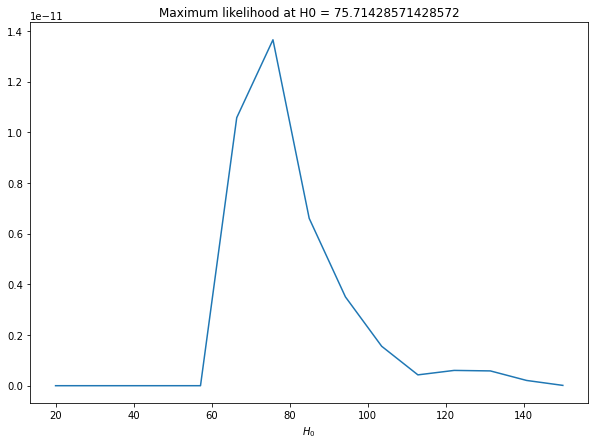

In [69]:
#First let's plot the likelihoods
H_values = np.linspace(50,90,15)
z = 44 * 72 / 3 * 10**(-5)
vp = 310
likelihood_values = np.zeros(len(H_values))
for i in range(len(H_values)):
    likelihood_values[i] = likelihood_all(H_values[i], z, vp) 
    
 
fig, ax = plt.subplots(1, figsize = (10,7))
plt.plot(H_values, likelihood_values)
plt.title("Maximum likelihood at H0 = " + str(H_values[likelihood_values == max(likelihood_values)][0]) )
plt.xlabel(r"$H_0$")
plt.show()

### To find the posterior on H0 I shoud do a marginalization on all the other variables for this I group the functions to break all the integrals to double integrals:

$Posterior(H0)$ = $prior(H_0) \ \ \int$
<font color='orange'> $\int prior(v_p) \ L2(d, v_p, H_0) \ L3(v_p) \ \ dv_p$ </font>
$\times$ 
<font color='green'>$\int \ prior(cos_{(i)})\ L1(d,cos_{(i)}) \ \ d(cos_{(i)}) $</font>
$\times$
$prior(d)\ \ dd$

    I first define the function of each of the inside integrals, both of them are a function of d, I combine them  and calculate them as one double integral and I name it Q.
    
Then we bring everything in a way to write this equation:
$posterior(H_0) = prior(H_0) \times G(H_0)$

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Hard part started!
Hard part completed!


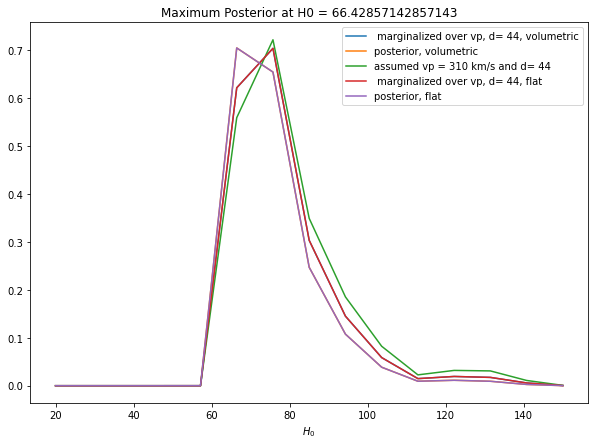

In [78]:
# First only marginalizing over vp
from scipy.integrate import quad, dblquad

def post_vp_margin(H0, z):
    return quad(lambda vp: p44(H0) * likelihood_all(H0, z, vp), -1000, 1000)[0]

def post_vp_margin_flat(H0, z):
    return quad(lambda vp: p44(H0) * likelihood_flat(H0, z, vp), -1000, 1000)[0]

def marginalized_posterior(H0):
    return quad(lambda z: p44(H0) * post_vp_margin(H0, z), 0.01, 0.5)[0]

def marginalized_posterior_flat(H0):
    return quad(lambda z: p44(H0) * post_vp_margin_flat(H0, z), 0.01, 0.5)[0]


#First let's plot the likelihoods
z = 44 * 72 / 3 * 10**(-5)

likelihood_values_vp_margin = np.zeros(len(H_values))
likelihood_values_vp_margin_flat = np.zeros(len(H_values))

posterior = np.zeros(len(H_values))
posterior_flat = np.zeros(len(H_values))

for i in range(len(H_values)):
    print(i)
    likelihood_values_vp_margin[i] = post_vp_margin(H_values[i], z) 
    likelihood_values_vp_margin_flat[i] = post_vp_margin_flat(H_values[i], z) 
   

 
#calculating posterior
print("Hard part started!")
posterior = np.vectorize(marginalized_posterior)(H_values)
posterior_flat = np.vectorize(marginalized_posterior_flat)(H_values)

print("Hard part completed!")
fig, ax = plt.subplots(1, figsize = (10,7))

if np.sqrt(np.dot(likelihood_values_vp_margin, likelihood_values_vp_margin)) == 0:
    len1 = 1
else:
    len1 = np.sqrt(np.dot(likelihood_values_vp_margin, likelihood_values_vp_margin))
plt.plot(H_values, likelihood_values_vp_margin/len1, label =" marginalized over vp, d= 44, volumetric")

if np.sqrt(np.dot(posterior, posterior)) == 0:
    len2 = 1
else:
    len2 = np.sqrt(np.dot(posterior, posterior))
plt.plot(H_values, posterior / len2, label = "posterior, volumetric")

if np.sqrt(np.dot(likelihood_values,likelihood_values)) == 0:
    len3 = 1
else:
    len3 = np.sqrt(np.dot(likelihood_values,likelihood_values))
plt.plot(H_values, likelihood_values / len3, label = "assumed vp = 310 km/s and d= 44")



if np.sqrt(np.dot(likelihood_values_vp_margin_flat, likelihood_values_vp_margin_flat)) == 0:
    len1 = 1
else:
    len1 = np.sqrt(np.dot(likelihood_values_vp_margin_flat, likelihood_values_vp_margin_flat))
plt.plot(H_values, likelihood_values_vp_margin_flat/len1, label =" marginalized over vp, d= 44, flat")

if np.sqrt(np.dot(posterior_flat, posterior_flat)) == 0:
    len2 = 1
else:
    len2 = np.sqrt(np.dot(posterior_flat, posterior_flat))
plt.plot(H_values, posterior_flat / len2, label = "posterior, flat")




plt.title("Maximum Posterior at H0 = " + str(H_values[posterior == max(posterior)][0]) )
plt.xlabel(r"$H_0$")
plt.legend()
plt.show()

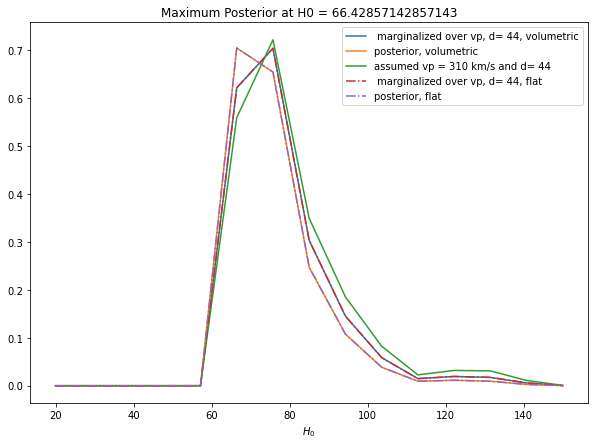

In [80]:
fig, ax = plt.subplots(1, figsize = (10,7))

if np.sqrt(np.dot(likelihood_values_vp_margin, likelihood_values_vp_margin)) == 0:
    len1 = 1
else:
    len1 = np.sqrt(np.dot(likelihood_values_vp_margin, likelihood_values_vp_margin))
plt.plot(H_values, likelihood_values_vp_margin/len1, label =" marginalized over vp, d= 44, volumetric", linestyle = "-")

if np.sqrt(np.dot(posterior, posterior)) == 0:
    len2 = 1
else:
    len2 = np.sqrt(np.dot(posterior, posterior))
plt.plot(H_values, posterior / len2, label = "posterior, volumetric", linestyle = "-")

if np.sqrt(np.dot(likelihood_values,likelihood_values)) == 0:
    len3 = 1
else:
    len3 = np.sqrt(np.dot(likelihood_values,likelihood_values))
plt.plot(H_values, likelihood_values / len3, label = "assumed vp = 310 km/s and d= 44", linestyle = "-")



if np.sqrt(np.dot(likelihood_values_vp_margin_flat, likelihood_values_vp_margin_flat)) == 0:
    len1 = 1
else:
    len1 = np.sqrt(np.dot(likelihood_values_vp_margin_flat, likelihood_values_vp_margin_flat))
plt.plot(H_values, likelihood_values_vp_margin_flat/len1, label =" marginalized over vp, d= 44, flat", linestyle = "-.")

if np.sqrt(np.dot(posterior_flat, posterior_flat)) == 0:
    len2 = 1
else:
    len2 = np.sqrt(np.dot(posterior_flat, posterior_flat))
plt.plot(H_values, posterior_flat / len2, label = "posterior, flat", linestyle = "-.")




plt.title("Maximum Posterior at H0 = " + str(H_values[posterior == max(posterior)][0]) )
plt.xlabel(r"$H_0$")
plt.legend()
plt.show()

In [15]:

# #These are for the case that you have inclination
# #first marginalization
# #def Q(d, H0):
# #    return dblquad(lambda vp, cos_i: p42(cos_i) * p43(vp) * L1(d,cos_i) * L2(d,vp,H0) * L3(vp) , -1, 1, lambda cos_i: -1000, lambda cos_i: 1000)[0]

# #Second marginalization
# #def G(H0):
# #    return dblquad(lambda r, d: p41(d) * Q(d, H0) , 0, 1000, lambda d: 0, lambda d: 1)[0]

# def G(H0):
#     return dblquad(lambda vp, d: p41(H0, d) * p43(vp) * L1(d) * L2(d,vp,H0) * L3(vp) , 0, np.inf, lambda d: -1000, lambda d: 1000)[0]

# #Now with everything we're ready to define the Posterior function on H0
# def posterior_H0(H0):
#     return  G(H0) * p44(H0)

### Now general API is ready and we're going to just make an array of H0 and all the posterior values


In [81]:
H_values = np.linspace(40,150,500)
H_posterior_volumetric_prior = np.zeros(len(H_values))
H_posterior_flat_prior = np.zeros(len(H_values))
likelihood_values_vp_margin = np.zeros(len(H_values))
likelihood_values_vp_margin_flat = np.zeros(len(H_values))



for num in range(len(H_values)):
    print(num)
    H_posterior_volumetric_prior[num] = marginalized_posterior(H_values[num])
    H_posterior_flat_prior[num] = marginalized_posterior(H_values[num])
    likelihood_values_vp_margin[num] = post_vp_margin(H_values[num], z) 
    likelihood_values_vp_margin_flat[num] = post_vp_margin_flat(H_values[num], z) 

    
    print(H_values[num])
    print(H_posterior_volumetric_prior[num])
    print("----------------------")

0
40.0
0.0
----------------------
1
40.22044088176353
0.0
----------------------
2
40.44088176352705
0.0
----------------------
3
40.66132264529058
0.0
----------------------
4
40.881763527054105
0.0
----------------------
5
41.102204408817634
0.0
----------------------
6
41.322645290581164
0.0
----------------------
7
41.54308617234469
0.0
----------------------
8
41.763527054108216
0.0
----------------------
9
41.983967935871746
0.0
----------------------
10
42.20440881763527
0.0
----------------------
11
42.4248496993988
0.0
----------------------
12
42.64529058116233
0.0
----------------------
13
42.86573146292585
0.0
----------------------
14
43.08617234468938
0.0
----------------------
15
43.3066132264529
0.0
----------------------
16
43.52705410821643
0.0
----------------------
17
43.74749498997996
0.0
----------------------
18
43.967935871743485
0.0
----------------------
19
44.188376753507015
0.0
----------------------
20
44.40881763527054
0.0
----------------------
21
44.6292

69.53907815631263
5.051094331077165e-15
----------------------
135
69.75951903807615
5.0554420059802894e-15
----------------------
136
69.97995991983967
5.049386478527465e-15
----------------------
137
70.20040080160321
5.0318661631561624e-15
----------------------
138
70.42084168336673
5.003528911198571e-15
----------------------
139
70.64128256513027
4.965470117503024e-15
----------------------
140
70.86172344689379
4.9179079207008e-15
----------------------
141
71.08216432865731
4.860211463143852e-15
----------------------
142
71.30260521042084
4.792792888915002e-15
----------------------
143
71.52304609218437
4.719034245253966e-15
----------------------
144
71.7434869739479
4.6445975585517715e-15
----------------------
145
71.96392785571142
4.574070655235684e-15
----------------------
146
72.18436873747495
4.508083611536236e-15
----------------------
147
72.40480961923848
4.443714648705301e-15
----------------------
148
72.625250501002
4.377563147769816e-15
----------------------
1

96.65330661322645
4.5243098114051e-16
----------------------
258
96.87374749498997
4.45704560455907e-16
----------------------
259
97.09418837675351
4.401015031990572e-16
----------------------
260
97.31462925851703
4.35441358200727e-16
----------------------
261
97.53507014028057
4.3147467551725174e-16
----------------------
262
97.75551102204409
4.279116362472649e-16
----------------------
263
97.97595190380761
4.2445189384050002e-16
----------------------
264
98.19639278557113
4.208113778427294e-16
----------------------
265
98.41683366733467
4.167431496369564e-16
----------------------
266
98.6372745490982
4.1205091624070125e-16
----------------------
267
98.85771543086173
4.065952175630532e-16
----------------------
268
99.07815631262525
4.0029343034766975e-16
----------------------
269
99.29859719438878
3.931154405886141e-16
----------------------
270
99.5190380761523
3.850770186685074e-16
----------------------
271
99.73947895791582
3.7623258010177615e-16
----------------------


123.32665330661322
6.106226806363753e-17
----------------------
379
123.54709418837675
6.131531604960782e-17
----------------------
380
123.76753507014028
6.155522552248186e-17
----------------------
381
123.9879759519038
6.17690316629695e-17
----------------------
382
124.20841683366733
6.194442777890578e-17
----------------------
383
124.42885771543087
6.207047806073048e-17
----------------------
384
124.64929859719439
6.21381514123857e-17
----------------------
385
124.86973947895791
6.214066913983438e-17
----------------------
386
125.09018036072145
6.207367798117686e-17
----------------------
387
125.31062124248497
6.193527254689934e-17
----------------------
388
125.53106212424849
6.172589744260341e-17
----------------------
389
125.75150300601203
6.144815995061354e-17
----------------------
390
125.97194388777555
6.110658061818501e-17
----------------------
391
126.19238476953907
6.07073032022587e-17
----------------------
392
126.4128256513026
6.025777886989984e-17
------------

150.0
7.601457208149364e-19
----------------------


In [83]:
likelihood_values = np.zeros(len(H_values))
for i in range(len(H_values)):
    likelihood_values[i] = likelihood_all(H_values[i], z, vp) 


5.296654312099192e-15


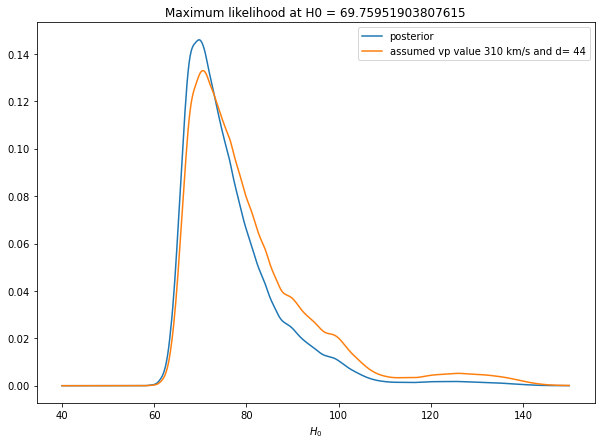

In [84]:
print(np.sqrt(np.dot(posterior, posterior)))
fig, ax = plt.subplots(1, figsize = (10,7))

if np.sqrt(np.dot(H_posterior_volumetric_prior, H_posterior_volumetric_prior)) == 0:
    len2 = 1
else:
    len2 = np.sqrt(np.dot(H_posterior_volumetric_prior, H_posterior_volumetric_prior))
plt.plot(H_values, H_posterior_volumetric_prior / len2, label = "posterior")

if np.sqrt(np.dot(likelihood_values,likelihood_values)) == 0:
    len3 = 1
else:
    len3 = np.sqrt(np.dot(likelihood_values,likelihood_values))
plt.plot(H_values, likelihood_values / len3, label = "assumed vp value 310 km/s and d= 44")

plt.title("Maximum likelihood at H0 = " + str(H_values[H_posterior_volumetric_prior == max(H_posterior_volumetric_prior)][0]) )
plt.xlabel(r"$H_0$")
plt.legend()
plt.show()

# COOL!!


In [93]:
#saving everything
import pandas as pd
data = pd.DataFrame(data = np.vstack([H_values, likelihood_values, likelihood_values_vp_margin, likelihood_values_vp_margin_flat, H_posterior_volumetric_prior, H_posterior_flat_prior]).T, columns = np.array(["H0", "Likelihood-d44-vp310", "marginal-vp", "marginal-vp-flat", "posterior-volumetric", "posterior-flat"]))
data.to_csv("./H0-likelihood-standard-siren.csv", sep=",")
data

,H0,Likelihood-d44-vp310,marginal-vp,marginal-vp-flat,posterior-volumetric,posterior-flat
0,40.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,40.220441,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,40.440882,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,40.661323,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,40.881764,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...
495,149.118236,1.744807e-14,9.942654e-14,8.916091e-10,9.183048e-19,9.183048e-19
496,149.338677,1.663163e-14,9.463422e-14,8.486339e-10,8.750251e-19,8.750251e-19
497,149.559118,1.587977e-14,9.022295e-14,8.090757e-10,8.345914e-19,8.345914e-19
498,149.779559,1.518136e-14,8.612791e-14,7.723535e-10,7.964565e-19,7.964565e-19


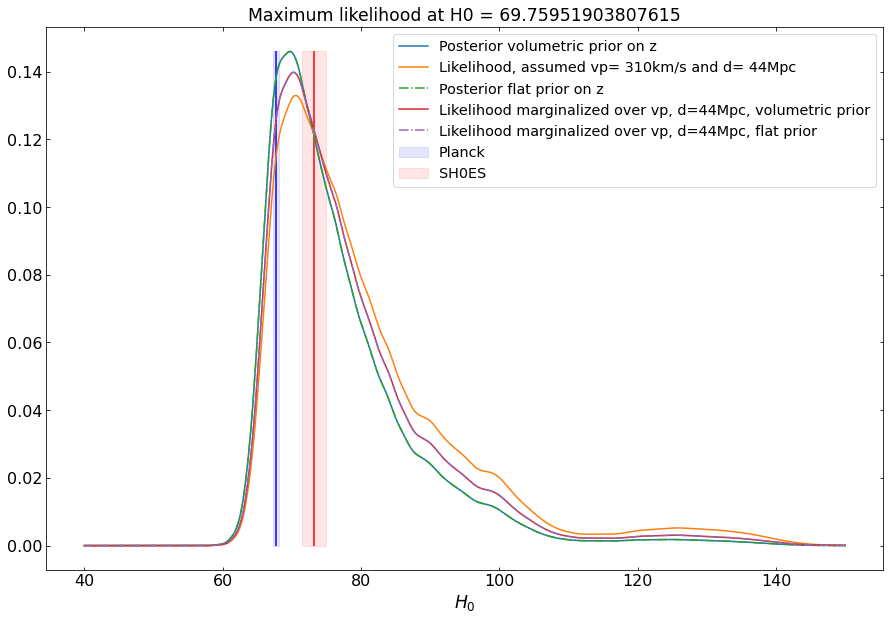

In [117]:
#Pretty plots!
import matplotlib.patches as patches

fig, ax = plt.subplots(1, figsize=(15,10))

if np.sqrt(np.dot(H_posterior_volumetric_prior, H_posterior_volumetric_prior)) == 0:
    len1 = 1
else:
    len1 = np.sqrt(np.dot(H_posterior_volumetric_prior, H_posterior_volumetric_prior))
plt.plot(H_values, H_posterior_volumetric_prior / len1, label = "Posterior volumetric prior on z", linestyle="-")

if np.sqrt(np.dot(likelihood_values,likelihood_values)) == 0:
    len3 = 1
else:
    len3 = np.sqrt(np.dot(likelihood_values,likelihood_values))
plt.plot(H_values, likelihood_values / len3, label = "Likelihood, assumed vp= 310km/s and d= 44Mpc", linestyle = "-")

if np.sqrt(np.dot(H_posterior_flat_prior, H_posterior_flat_prior)) == 0:
    len1 = 1
else:
    len2 = np.sqrt(np.dot(H_posterior_flat_prior, H_posterior_flat_prior))
plt.plot(H_values, H_posterior_flat_prior / len2, label = "Posterior flat prior on z", linestyle = "-.")

if np.sqrt(np.dot(likelihood_values_vp_margin, likelihood_values_vp_margin)) == 0:
    len2 = 1
else:
    len2 = np.sqrt(np.dot(likelihood_values_vp_margin, likelihood_values_vp_margin))
plt.plot(H_values, likelihood_values_vp_margin / len2, label = "Likelihood marginalized over vp, d=44Mpc, volumetric prior", linestyle = "-")

if np.sqrt(np.dot(likelihood_values_vp_margin_flat, likelihood_values_vp_margin_flat)) == 0:
    len2 = 1
else:
    len2 = np.sqrt(np.dot(likelihood_values_vp_margin_flat, likelihood_values_vp_margin_flat))
plt.plot(H_values, likelihood_values_vp_margin_flat / len2, label = "Likelihood marginalized over vp, d=44Mpc, flat prior", linestyle = "-.")
         

plt.vlines(67.74, 0 , max(H_posterior_volumetric_prior/len1), color = "blue")
rect1 = patches.Rectangle((67.74-0.46, 0), 2*0.46, max(H_posterior_volumetric_prior/len1), linewidth=1, edgecolor='blue', facecolor='blue', label="Planck", alpha=0.1)
# Add the patch to the Axes
ax.add_patch(rect1)

plt.vlines(73.24, 0 , max(H_posterior_volumetric_prior/len1), color = "red")
rect2 = patches.Rectangle((73.24-1.74, 0), 2*1.74, max(H_posterior_volumetric_prior/len1), linewidth=1, edgecolor='r', facecolor='red', label="SH0ES", alpha = 0.1)
# Add the patch to the Axes
ax.add_patch(rect2)

plt.title("Maximum likelihood at H0 = " + str(H_values[H_posterior_volumetric_prior == max(H_posterior_volumetric_prior)][0]), fontsize="xx-large" )
plt.xlabel(r"$H_0$", fontsize="xx-large")
plt.legend(fontsize = "x-large")
plt.tick_params(which='both',direction='in',labelsize=16,left=True,right=True,bottom=True,top=True)
plt.savefig("H0-posterior-standard-siren.png")
plt.show()

# Cross-correlating with galaxy catalogs



The galaxy catalog we're using is the GLADE+ catalog. 

below first I load the catalog and read some of the informations from it.


In [118]:
catalog_data = pd.read_csv("./GLADE+.txt", sep =" ")
catalog_data

/Users/saba/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,GLADE-no,PGC-no,GWGC-name,HyperLEDA-name,2MASS-name,WISExSCOS-name,SDSS-DR16Q-name,Object-type-flag,RA,DEC,...,v_err,z_err,d_L,d_L_err,dist_flag,M_star,M_star_err,Merger_rate,Merger_rate_err,Unnamed: 39
0,1,43495.0,NGC4736,NGC4736,12505314+4107125,J125053.14+410712.7,NaN,G,192.721451,41.120152,...,NaN,0.000029,4.392418,NaN,3,NaN,NaN,NaN,NaN,NaN
1,2,41934.0,NGC4548,NGC4548,12352642+1429467,J123526.45+142946.9,NaN,G,188.860123,14.496320,...,0.000732,0.000119,15.876007,3.263033,3,0.55,0.07,4.0,0.8,NaN
2,3,60921.0,NGC6503,NGC6503,17492651+7008396,J174926.45+700840.8,NaN,G,267.360474,70.144341,...,0.000222,0.000029,12.446600,0.987781,3,NaN,NaN,NaN,NaN,NaN
3,4,40950.0,NGC4442,NGC4442,12280389+0948130,J122803.90+094813.3,NaN,G,187.016220,9.803620,...,0.000558,0.000103,11.461371,2.484465,3,0.68,0.09,4.1,0.8,NaN
4,5,41164.0,NGC4469,NGC4469,NaN,J122928.05+084500.8,NaN,G,187.367000,8.749890,...,0.000745,0.000120,15.180920,3.321809,3,0.36,0.05,3.8,0.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23181753,23181754,NaN,NaN,NaN,NaN,NaN,235959.78+285717,Q,359.999118,28.954734,...,NaN,0.113916,20403.464630,NaN,1,NaN,NaN,NaN,NaN,NaN
23181754,23181755,NaN,NaN,NaN,NaN,NaN,235959.83+344315,Q,359.999303,34.720842,...,NaN,0.135597,27158.368406,NaN,1,NaN,NaN,NaN,NaN,NaN
23181755,23181756,NaN,NaN,NaN,NaN,NaN,235959.90+031606.9,Q,359.999615,3.268586,...,NaN,0.073688,8792.439985,NaN,1,NaN,NaN,NaN,NaN,NaN
23181756,23181757,NaN,NaN,NaN,NaN,NaN,235959.94+204315.8,Q,359.999759,20.721079,...,NaN,0.099325,16022.500633,NaN,1,NaN,NaN,NaN,NaN,NaN


In [119]:
ra_galaxy = np.array(catalog_data["RA"])
dec_galaxy = np.array(catalog_data["DEC"])
d_L_galaxy = np.array(catalog_data["d_L"])
redshift_galaxy = np.array(catalog_data["z_cmb"])
mass_galaxy = np.array(catalog_data["M_star"])
error_on_mass_galaxy = np.array(catalog_data["M_star_err"])
error_on_d_galaxy = np.array(catalog_data["d_L_err"])
error_on_z_galaxy = np.array(catalog_data["z_err"])
peculiar_correction_galaxy = np.array(catalog_data["z_flag"])

<ipython-input-121-5bf02dae7d5b>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111, projection="aitoff")


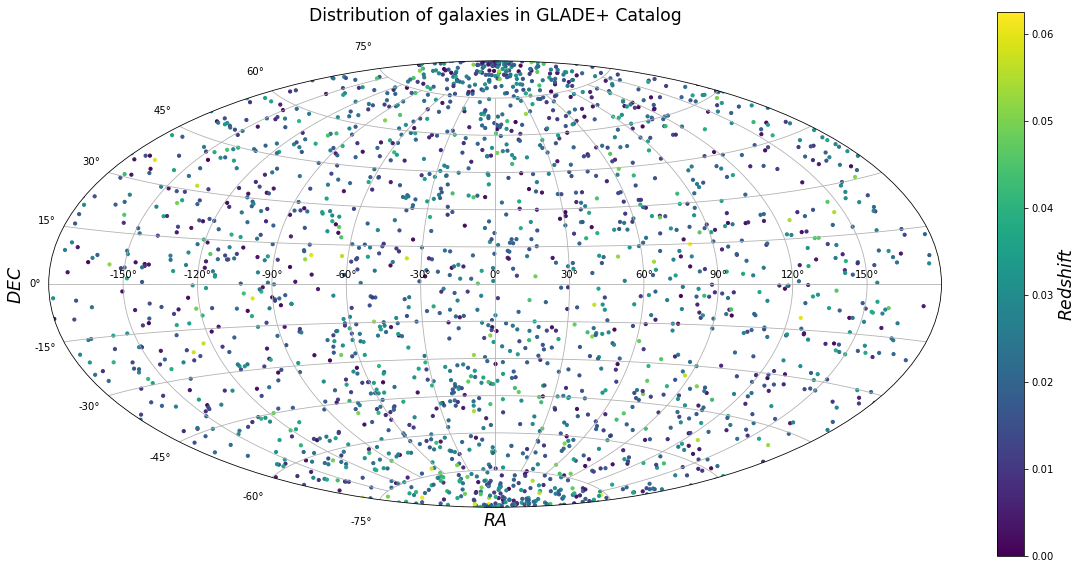

In [121]:
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
ax = plt.subplot(111, projection="aitoff")
#plt.plot(gal.l.wrap_at(180*u.deg), gal.b.wrap_at(180*u.deg), linestyle='None')
plt.grid(True)

num = 4000
p = ax.scatter(ra_galaxy[:num], dec_galaxy[:num], c = redshift_galaxy[:num], s= 10)
ax.set_title("Distribution of galaxies in GLADE+ Catalog", pad = 40, fontsize="xx-large")
ax.set_xlabel('$RA$', fontsize= "xx-large")
ax.set_ylabel('$DEC$', fontsize = "xx-large")

cb = fig.colorbar(p)
cb.set_label('$Redshift$', fontsize = "xx-large")
cb.mappable.set_clim([min(redshift_galaxy[:num]),max(redshift_galaxy[:num])])
plt.savefig("GLADE+.png")
plt.show()


For the first step before moving to the standard paper's aproach, I will just do my own experiment.
I use GLADE+ galaxies as posterior on z p(z).

* __First step: I'll read the posterior on RA and DEC of the event from GW data then locate all the galaxies in this interval of RA and DEC.__

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        8.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 7.000e+00, 1.000e+00, 7.000e+00,
        1.000e+01, 0.000e+00, 8.000e+00, 4.000e+00, 8.000e+00, 7.000e+00,
        8.000e+00, 5.000e+00, 7.000e+00, 1.700e+01, 2.700e+01, 7.000e+00,
        2.000e+01, 2.400e+01, 3.700e+01, 2.900e+01, 2.700e+01, 2.900e+01,
        1.500e+01, 3.200e+01, 5.200e+01, 3.900e+01, 4.000e+01, 4.600e+01,
        2.800e+01, 4.100e+01, 6.100e+01, 3.800e+01, 7.900e+01, 5.800e+01,
        7.000e+01, 5.600e+01, 7.100e+01, 7.000e+01, 7.500e+01, 6.100e+01,
        7.500e+01, 8.100e+01, 6.400e+01, 6.600e+01, 7.500e+01, 7.200e+01,
        8.100e+01, 8.100e+01, 7.900e+01, 7.100e+01, 7.400e+01, 7.900e+01,
        9.300e+01, 5.500e+01, 7.500e+0

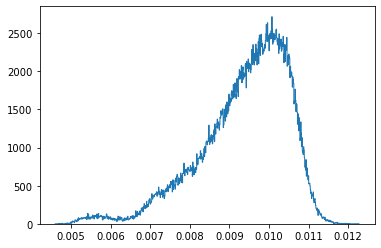

In [128]:
name = "GW170817_124104"
import h5py
GW_data = h5py.File("./d_L-posteriors/"+name+"-PYCBC-POSTERIOR-XPHM.hdf", "r")
GW_data.keys()
distance_posterior = np.array(GW_data["samples"]["distance"]) 
inclination_posterior = np.array(GW_data["samples"]["inclination"]) 

#For this specific case of GW170817 RA and DEC are fixed! we use the redshift posterior as p(z)
#ra_posterior = np.array(GW_data["samples"]["ra"])* 180 / np.pi
#dec_posterior = np.array(GW_data["samples"]["dec"])* 180 / np.pi
redshift_posterior = np.array(GW_data["samples"]["redshift"])
plt.hist(redshift_posterior, histtype = "step", bins = int(np.sqrt(len(redshift_posterior))))

In [153]:
#Now we define the redshift prior as this posterior:

#priors
import scipy as sp

#Volumetric prior
KDE_z = sp.stats.gaussian_kde(redshift_posterior)#post)
#Likelihoods
def p41_new(z):
    #From GW pe
    return KDE_z(z)
        
#And now defining the overall posterior function:
def likelihood_all_new(H0, z, vp): #i in degree
    #cos_i = np.cos(i*np.pi/180)
    return p41_new(z)*p43(vp)* L1(z, H0)*L2(z ,vp,H0)*L3(vp)

def post_vp_margin_new(H0, z):
    return quad(lambda vp: likelihood_all_new(H0, z, vp), -1000, 1000)[0]

def marginalized_posterior_new(H0):
    return quad(lambda z: p44(H0) * post_vp_margin_new(H0, z), 0.004592198430389132 , 0.012280586606259662)[0]



In [156]:
H_values = np.linspace(40,150,100)
vp = 310
z = 0.01

likelihood_values_new = np.zeros(len(H_values))
likelihood_values_vp_margin_new = np.zeros(len(H_values))
posterior_new = np.zeros(len(H_values))

for i in range(len(H_values)):
    print(i)
    likelihood_values_vp_margin_new[i] = post_vp_margin_new(H_values[i], z)  
    posterior_new[i] = marginalized_posterior_new(H_values[i])
    likelihood_values_new[i] = likelihood_all_new(H_values[i], z, vp) 

    
fig, ax = plt.subplots(1, figsize = (10,7))

if np.sqrt(np.dot(likelihood_values_vp_margin_new, likelihood_values_vp_margin_new)) == 0:
    len1 = 1
else:
    len1 = np.sqrt(np.dot(likelihood_values_vp_margin_new, likelihood_values_vp_margin_new))
plt.plot(H_values, likelihood_values_vp_margin_new/len1, label =" Likelihood marginalized over vp")

if np.sqrt(np.dot(posterior_new, posterior_new)) == 0:
    len2 = 1
else:
    len2 = np.sqrt(np.dot(posterior_new, posterior_new))
plt.plot(H_values, posterior_new / len2, label = "Posterior")

if np.sqrt(np.dot(likelihood_values_new,likelihood_values_new)) == 0:
    len3 = 1
else:
    len3 = np.sqrt(np.dot(likelihood_values_new,likelihood_values_new))
plt.plot(H_values, likelihood_values_new / len3, label = "Likelihood assumed vp = 310 km/s and d= 44Mpc")


plt.title("Maximum Posterior at H0 = " + str(H_values[posterior_new == max(posterior_new)][0]) )
plt.xlabel(r"$H_0$")
plt.legend()
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/saba/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-156-a598097d799b>", line 12, in <module>
    posterior_new[i] = marginalized_posterior_new(H_values[i])
  File "<ipython-input-153-b50549604dbf>", line 22, in marginalized_posterior_new
    return quad(lambda z: p44(H0) * post_vp_margin_new(H0, z), 0.004592198430389132 , 0.012280586606259662)[0]
  File "/Users/saba/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py", line 351, in quad
    retval = _quad(func, a, b, args, full_output, epsabs, epsrel, limit,
  File "/Users/saba/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py", line 463, in _quad
    return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
  File "<ipython-input-153-b50549604dbf>", line 22, in <lambda>
    return quad(lambda z: p44(H0) * po

TypeError: object of type 'NoneType' has no len()

In [150]:
print(min(redshift_posterior))
print(max(redshift_posterior))

0.004592198430389132
0.012280586606259662


Now we do not have an electromagnetic counterpart for our GW events all the time. In the second method we use a cross-correlation technique to fill the absence of the electromagnetic counterparts with galaxy candidate as the host of the event in the galaxy catalogs.

Again we use Bayes theorem and we will have:

$p(H_0|d_{GW},d_{EM}) \propto p(d_{GW},D_{EM}|H_{0})p(H_{0})$


This means for calculating the posterior on $H_0$ we only need to calculate the joint likelihood of $d_{EM}$ and $d_{GW}$ and assume a prior for $p(H_0)$.

__Calculating the joint likelihood:__

$d_{EM}$ depends on our choice of galaxy as the electromagnetic counter part, thus we actually have something like this for the joint likelihood of $d_{GW}$ and $d_{EM}$:

We seprate each of the likelihoods as they are two independent experiments and then by marginalizing over all of the choices for galaxies we will have:

1- $d_{EM}$ is a function of $z_i$ and $\Omega_i$ (choice of the galaxy)

2- $d_{GW}$ is a function of $d_L$ AND $\Omega_{GW}$ (GW PE)

3- The right choice of galaxy is the one that pick a galaxy at the position of GW source, thus we will have: $\delta_D(\Omega_{GW}-\Omega_{i})$

4- The right choice of galaxy is the one that picks a $z_i$ which relates the z_i to the correct $d_L$ estimated form the GW data, accordingly: $\delta_D(d_L - d_L(z_i,H_0) )$

5- Then after writing the likelihoods this way we should just marginalize it over all the $d_L$s and $\Omega_GW$s to bring together the result of observations of many sources to estimate the H0. Our final relation with this manner will be:

<font color='purple'>  $ p(d_{GW},d_{EM}|\{z_j,\Omega_j\},H_0) \ \propto \ \Sigma_i w_i \ 
\int \ dd_L \ d\Omega_{GW} p(d_{GW}|d_L,\Omega_{GW}) \ \times \ 
p(d_{EM}|\{z_j,\Omega_j\})\ \delta_D(d_L - d_L(z_i, H_0))\ \delta_D(\Omega_{GW} - \Omega_i)$ </font>

The only unknown terms in the above relation are:

1- $p(d_{GW}|d_L,\Omega_{GW})$ 

2- $p(d_{EM}|\{z_j,\Omega_j\})$

We can calculate each of these separatly. We calculate the first one from the GW PEs and the second one from galaxy catalogs.

__Calculating the two likelihood terms:__

1- For the clculation of the first term we need to have all the followings:

    1.1- Position probability: $p(\Omega)$
    
    1.2- Location of the event: $\mu(\Omega)$
    
    1.3- Normalization factor: $N(\Omega)$
    
    1.4- distribution scale: $\sigma(\Omega)$
    
Having all of these we can assume a gaussian distribution for the $d_{GW}$ given the $d_L$ and GW position angle:

<font color='blue'> $p(d_{GW}|d_L,\Omega) \propto \ p(\Omega) \frac{1}{\sqrt{2\pi}\sigma(\Omega)} \ exp[-\frac{(d_L - \mu(\Omega))^2}{2\sigma(\Omega)^2}]N(\Omega)$ </font>

2- For the second term we just need the probability of the given galaxy with the electromagnetic distance $d_{EM}$ and redshift $z_{obs,i}$, given all the other galaxies, I can write it straight forwardly as follows:

<font color='green'> $p(d_{EM}|\{z_j\}) = \prod_i p(z_{obs,i}|z_i)$ </font>

Now we have all the terms and calculation starts: